# 神经网络的构成

In [1]:
import torch

In [2]:
#标量
x = torch.rand(10)
x.size()

torch.Size([10])

In [3]:
#向量（1维张量）
temp = torch.FloatTensor([23,24,24.5,26,27.2,23.0])
temp.size()

torch.Size([6])

In [4]:
#矩阵（2维向量）
from sklearn.datasets import load_boston
boston = load_boston()
boston_tensor = torch.from_numpy(boston.data)
boston_tensor.size()

torch.Size([506, 13])

In [5]:
boston_tensor[:2]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
         6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
         7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
         9.1400e+00]], dtype=torch.float64)

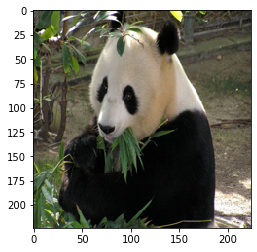

In [7]:
#3维张量
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
#使用PIL包从磁盘读入图像并转成numpy数组
panda = np.array(Image.open('panda.jpg').resize((224,224)))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()

output = torch.Size((224,224,3))

#显示图片
plt.imshow(panda)

In [8]:
#切片张量
sales = torch.FloatTensor([1000.0,323.2,333.4,444.5,1000.0,323.2,333.4,444.5])

sales[:5]

tensor([1000.0000,  323.2000,  333.4000,  444.5000, 1000.0000])

In [9]:
sales[:-5]

tensor([1000.0000,  323.2000,  333.4000])

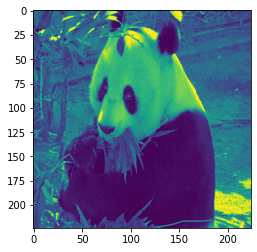

In [10]:
plt.imshow(panda_tensor[:,:,0].numpy())

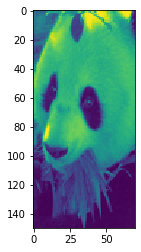

In [11]:
plt.imshow(panda_tensor[25:175,60:130,0].numpy())

In [12]:
#torch.eye(shape)生成一个对角线元素为1的对角矩阵
sales = torch.eye(3,3)
sales[0,1]

tensor(0.)

In [ ]:
#4维张量
cats = glob(data_path+'*.jpg')
#将图片转换成numpy数组
cat_imgs = np.array([np.array(Image.open(cat).resize((224,224)))for cat in cats[:64]])
cat_imgs = cat_imgs.reshape(-1,224,224,3)
cat_tensors = torch.from_numpy(cat_imgs)
cat_tensor.size()

In [13]:
#执行张量加法运算的不同方式
a = torch.rand(2,2)
b = torch.rand(2,2)
c = a + b
d = torch.add(a,b)
#和自身相加
a.add_(5)
a*b
a.mul(b)
#和自身相乘
a.mul_(b)

tensor([[1.2011, 3.4168],
        [4.9028, 3.3365]])

In [14]:
#GPU上的乘法运算
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)

a.matmul(b)

tensor([[2453.5820, 2486.6760, 2469.2319,  ..., 2468.3030, 2489.9287,
         2450.4631],
        [2478.4902, 2501.0850, 2464.0603,  ..., 2455.6431, 2475.9224,
         2461.6953],
        [2474.3542, 2497.5691, 2486.6475,  ..., 2461.3289, 2494.8623,
         2446.3010],
        ...,
        [2470.3425, 2502.9954, 2479.5950,  ..., 2485.8391, 2471.0935,
         2449.0049],
        [2472.3960, 2506.2773, 2489.1829,  ..., 2466.7195, 2494.0398,
         2462.6501],
        [2481.7825, 2528.2976, 2501.5293,  ..., 2484.3967, 2501.8958,
         2496.8433]])

In [19]:
#将张量转移到GPU
a = a.cuda()
b = b.cuda()

a.matmul(b)

RuntimeError: CUDA error: unspecified launch failure

In [24]:
from torch.autograd import Variable

x = Variable(torch.ones(2,2),requires_grad=True)
y = x.mean()

y.backward()

x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [25]:
x.grad_fn

In [26]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [27]:
y.grad_fn

In [39]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

In [41]:
#创建学习参数
def get_weights():
    w = Variable(torch.randn(1),requires_grad = True)
    b = Variable(torch.randn(1),requires_grad = True)
    return w,b

In [30]:
def simple_network(x):
    y_pred = torch.matmul(x,w) + b
    return y_pred

In [33]:
f = torch.nn.Linear(17,1)
f

Linear(in_features=17, out_features=1, bias=True)

In [54]:
#损失函数
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None : param.grad.data.zero_()
        loss.backward()
        return loss.data

In [35]:
#优化
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

In [58]:
#实现第一个神经网络
x,y = get_data() #x - 表示训练数据, y - 表示目标变量
w,b = get_weights() #w,b - 学习参数
for i in range(500):
    y_pred = simple_network(x) #计算wx + b 的函数
    loss = loss_fn(y,y_pred) #计算y和y_pred的平方差的和
    if i % 50 == 0:
        print(loss)
learning_rate=0.001
optimize(learning_rate) #调整w,b 将损失最小化

tensor(1412.8933)
tensor(1412.8933)
tensor(1412.8933)
tensor(1412.8933)
tensor(1412.8933)
tensor(1412.8933)
tensor(1412.8933)
tensor(1412.8933)
tensor(1412.8933)
tensor(1412.8933)


In [ ]:
from torch.utils.data import Dataset
class DogsAndCatsDataset(Dataset):
    def __init__(self,):
        pass
    def __len__(self):
        pass
    def __getitem__(self,idx):
        pass

In [ ]:
class DogsAndCatsDataset(Dataset):
    def __init__(self,root_dir,size=(224,224)):
        self.files = glob(root_dir)
        self.size = size
    def __len__(self):
        return len(self.files)
    def __getitem__(self,idx):
        img = np.asarray(Image.open(self.files[idx]).resize(self.size))
        label = self.files[idx].split('/')[-2]
        return img,label

In [ ]:
from torch.utils.data import Dataset, DataLoader

dataloader = DataLoader(DogsAndCatsDataset,batch_size=32,num_workers=2)
for imgs , labels in dataloader:
        #Apply your DL on the dataset.
    pass